# Final project - Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
global_df=pd.read_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/global_df_clean.csv")

/var/folders/54/4cl_lcsx2v3_cd3ntyrh62340000gn/T/ipykernel_40763/2248467420.py:1: DtypeWarning: Columns (8,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  global_df=pd.read_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/global_df_clean.csv")


In [3]:
global_df = global_df.drop("Unnamed: 0", axis=1)

In [4]:
global_df['journey_start_date'] = pd.to_datetime(global_df['journey_start_date'])
global_df["year"]=global_df['journey_start_date'].dt.year

In [5]:
global_df.head()

,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,journey_start_towngroup,...,journey_end_lon,journey_end_lat,journey_end_insee,journey_end_department,journey_end_towngroup,journey_distance,journey_duration,has_incentive,nb_passengers,year
0,2520011,f5bc5273-79ab-42c9-9c22-aef9b375f87e,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.51,48.89,93062,93.0,Ile-De-France Mobilites,...,2.54,48.90,93014,93.0,Ile-De-France Mobilites,3187,47,OUI,2,2020
1,2519969,b737dca1-e1e8-4d73-bac5-4f2240b153f3,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.76,48.85,77307,77.0,Ile-De-France Mobilites,...,2.83,48.88,77315,77.0,Ile-De-France Mobilites,8773,15,OUI,2,2020
2,2519968,c6e2cdda-2348-4389-8490-78b2704a43a5,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.28,48.84,75056,75.0,Ile-De-France Mobilites,...,2.28,48.82,92040,92.0,Ile-De-France Mobilites,3143,15,OUI,2,2020
3,2519970,e6baafd7-1aeb-4a6e-b7aa-3f5f54e4559b,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.26,48.72,91377,91.0,Ile-De-France Mobilites,...,2.31,48.70,91161,91.0,Ile-De-France Mobilites,7491,16,OUI,2,2020
4,2519963,8b31f193-af61-4664-bbde-52d93271dc95,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.78,48.87,77132,77.0,Ile-De-France Mobilites,...,2.81,48.87,77268,77.0,Ile-De-France Mobilites,3991,8,OUI,2,2020


<AxesSubplot:>

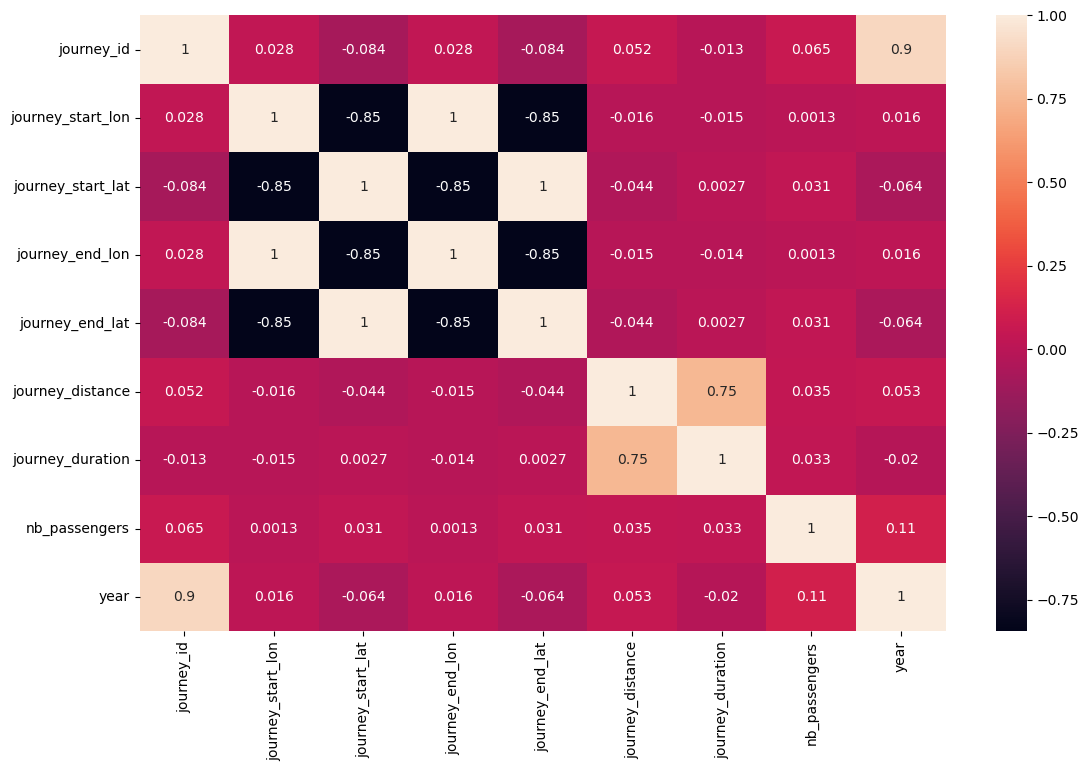

In [6]:
fig=plt.figure(figsize=(13,8))
sns.heatmap(global_df.corr(),annot=True)

## Evolution of carpool journeys volume and of incentivized journeys

In [7]:
global_evol=pd.crosstab(global_df.journey_start_date, global_df.journey_id.count())

In [8]:
global_evol

col_0,9607669
journey_start_date,
2019-02-04,1
2019-02-05,1
2019-02-06,1
2019-02-07,1
2019-02-08,1
...,...
2023-01-27,29429
2023-01-28,13352
2023-01-29,11059


Text(0, 0.5, 'Number of carpooling journeys')

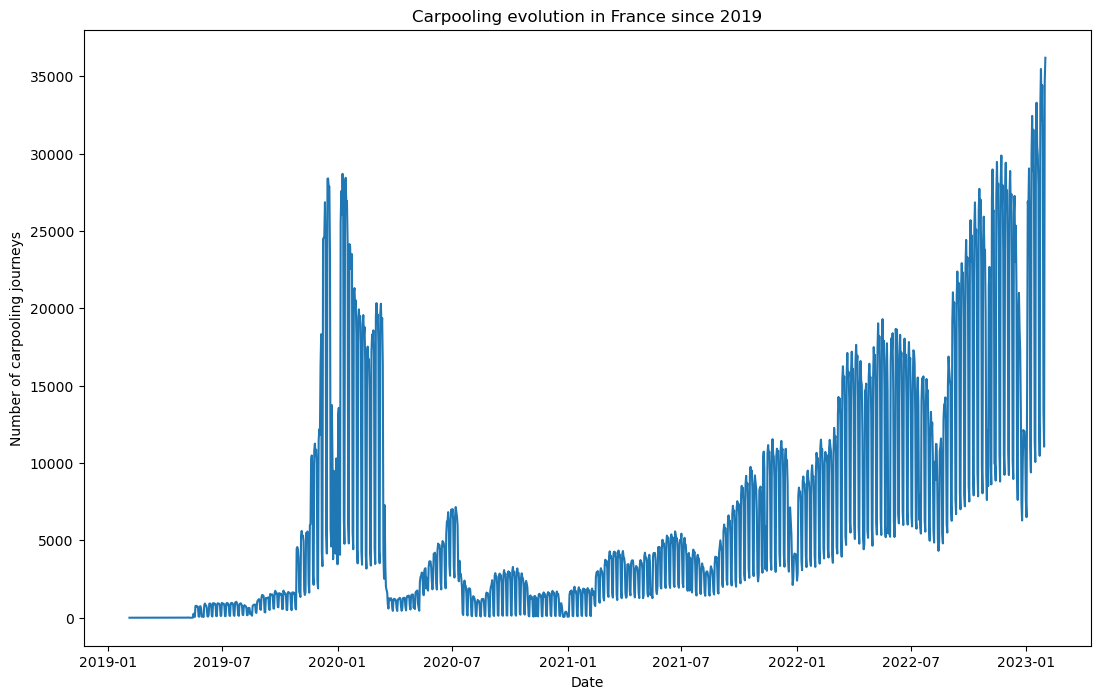

In [9]:
fig=plt.figure(figsize=(13,8))
plt.plot(global_evol)
plt.title("Carpooling evolution in France since 2019")
plt.xlabel("Date")
plt.ylabel("Number of carpooling journeys")


In [10]:
fig.savefig("global_evolution.jpg")

In [11]:
incentive_evol=pd.crosstab(global_df.year, global_df.has_incentive)

In [12]:
incentive_evol["Total_journeys"]=incentive_evol["OUI"]+incentive_evol["NON"]
incentive_evol["Percentage_incentives"]=round(incentive_evol["OUI"]/(incentive_evol["OUI"]+incentive_evol["NON"])*100,2)

In [13]:
incentive_evol

has_incentive,NON,OUI,Total_journeys,Percentage_incentives
year,,,,
2019,180926,570696,751622,75.93
2020,628752,1083626,1712378,63.28
2021,79718,1398116,1477834,94.61
2022,229715,4681458,4911173,95.32
2023,20944,733718,754662,97.22


In [14]:
incentive_evol[:4]

has_incentive,NON,OUI,Total_journeys,Percentage_incentives
year,,,,
2019,180926,570696,751622,75.93
2020,628752,1083626,1712378,63.28
2021,79718,1398116,1477834,94.61
2022,229715,4681458,4911173,95.32


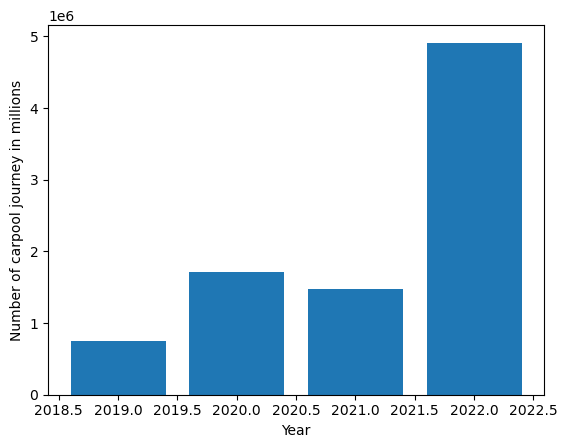

In [15]:
x_values=incentive_evol.index[:4]
y_values = incentive_evol["Total_journeys"][:4] 
plt.xlabel("Year")
plt.ylabel("Number of carpool journey in millions")
plt.bar(x_values, y_values)
plt.show()

Text(0, 0.5, 'Number of carpool journeys')

<Figure size 1000x800 with 0 Axes>

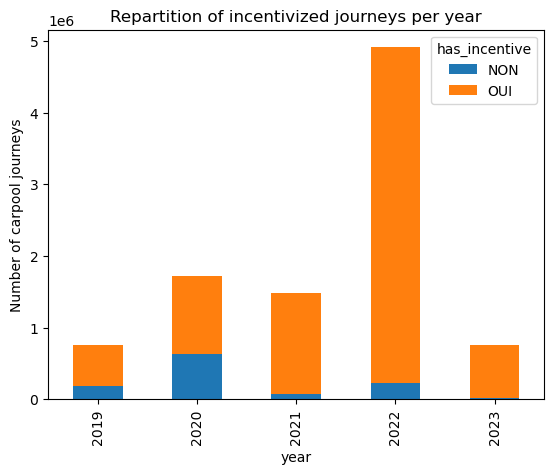

In [16]:
fig=plt.figure(figsize=(10,8))
global_df.groupby(['year', 'has_incentive']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Repartition of incentivized journeys per year")
plt.ylabel("Number of carpool journeys")

In [17]:
fig.savefig("incentives_or_no_per_year.jpg")

## An increase in favor of short distance carpooling ?  

In [18]:
repartition_distance=global_df[global_df["journey_distance"]<200000]

[Text(0.5, 1.0, 'Distribution of journeys under 200km'),
 Text(0.5, 0, 'Journey distance in meter')]

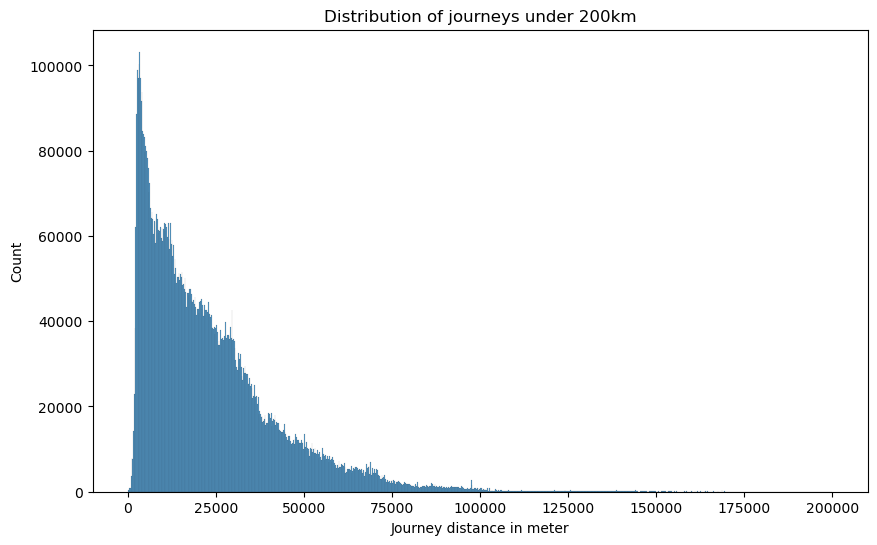

In [19]:
fig=plt.figure(figsize=(10,6))
sns.histplot(repartition_distance.journey_distance).set(title="Distribution of journeys under 200km",xlabel="Journey distance in meter")

In [20]:
fig.savefig("hist_distance_under200.jpg")

In [71]:
pd.DataFrame(round(global_df.journey_distance.describe(),2))

,journey_distance
count,9607669.00
mean,23576.18
std,22103.07
min,1.00
25%,8678.00
50%,18372.00
75%,31902.00
max,1132379.00


/Users/clemence/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Distribution of distance journeys'),
 Text(0.5, 0, 'Journey distance in meter')]

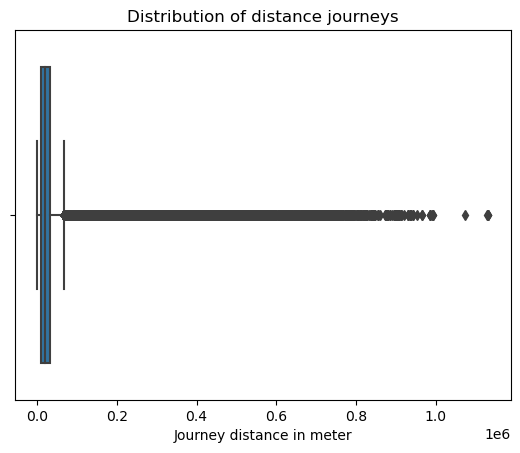

In [68]:
sns.boxplot(global_df.journey_distance).set(title="Distribution of distance journeys",xlabel="Journey distance in meter")

In [22]:
short_distance=global_df[global_df["journey_distance"]<80000]

Text(0, 0.5, 'Number of carpooling journeys')

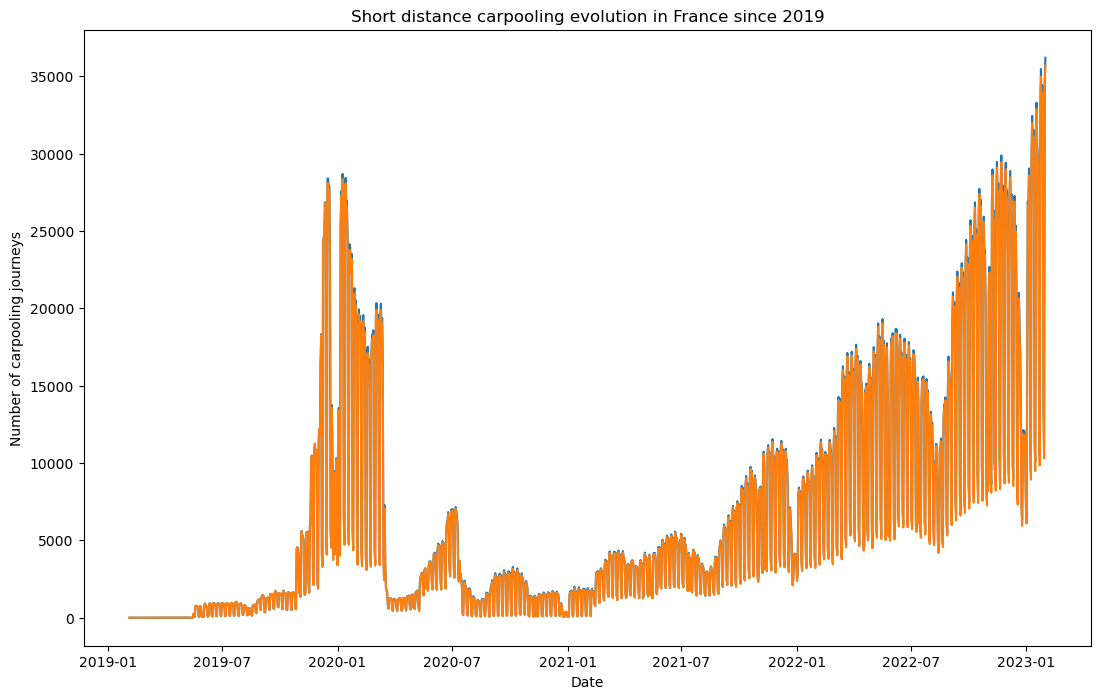

In [23]:
short_distance_evol=pd.crosstab(short_distance.journey_start_date, short_distance.journey_id.count())
fig=plt.figure(figsize=(13,8))
plt.plot(global_evol)
plt.plot(short_distance_evol)
plt.title("Short distance carpooling evolution in France since 2019")
plt.xlabel("Date")
plt.ylabel("Number of carpooling journeys")

## Correlation with weekdays

In [24]:
schedule_df=pd.read_csv("/Users/clemence/IRONHACK/Final_project/Autres datasets/Calendrier/schedule.csv")
schedule_df.dtypes
schedule_df["date"]=schedule_df["date"].astype(str)

In [25]:
global_df["journey_start_date"]=global_df["journey_start_date"].astype(str)

In [26]:
global_schedule_df=pd.merge(global_df,schedule_df,left_on=global_df["journey_start_date"],right_on=schedule_df["date"])

In [27]:
numb_weekday=pd.crosstab(global_schedule_df.weekday, global_schedule_df.journey_id.count())

In [28]:
numb_weekday

col_0,8853007
weekday,
Friday,1385028
Monday,1552146
Saturday,577085
Sunday,483701
Thursday,1607420
Tuesday,1677782
Wednesday,1569845


So far we can see that carpooling is overwhelmingly used for short trips and on weekdays, which corroborates the idea that carpooling to work is the main use. We can check as well the hours of travelling to reinforce these hypothesis. 

## Correlation with travelling hours 

In [29]:
rush_hour=pd.crosstab(global_schedule_df.journey_start_time,global_schedule_df.weekday)
rush_hour

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
journey_start_time,,,,,,,
00:00:00,1695,1407,2084,2407,1616,1385,1592
00:10:00,1283,1026,1894,2226,1229,931,1177
00:20:00,1123,899,1755,2012,997,829,980
00:30:00,990,744,1566,1898,820,663,846
00:40:00,827,622,1329,1780,755,575,728
...,...,...,...,...,...,...,...
23:10:00,2798,2043,2781,2075,2653,2521,2487
23:20:00,2766,1825,2730,1978,2583,2317,2335
23:30:00,2618,1701,2779,1849,2375,2047,2172


In [30]:
rush_hour.index = pd.to_datetime(rush_hour.index)
rush_hourly = rush_hour.groupby(pd.Grouper(freq="H")).sum()

In [31]:
rush_hourly

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
journey_start_time,,,,,,,
2023-03-13 00:00:00,6652,5105,9795,12107,6129,4919,5969
2023-03-13 01:00:00,3859,2661,6042,8452,2995,2546,3220
2023-03-13 02:00:00,2248,1483,3990,5501,1921,1710,1888
2023-03-13 03:00:00,3163,2371,4713,3140,2853,2929,2817
2023-03-13 04:00:00,10979,10369,5650,2943,11912,11870,11776
2023-03-13 05:00:00,24565,21017,8663,4893,25827,25508,25292
2023-03-13 06:00:00,62410,71849,9861,7961,74524,77764,71684
2023-03-13 07:00:00,225054,274362,15449,8609,285271,304127,272900
2023-03-13 08:00:00,199499,232333,24641,10786,245105,258512,236131


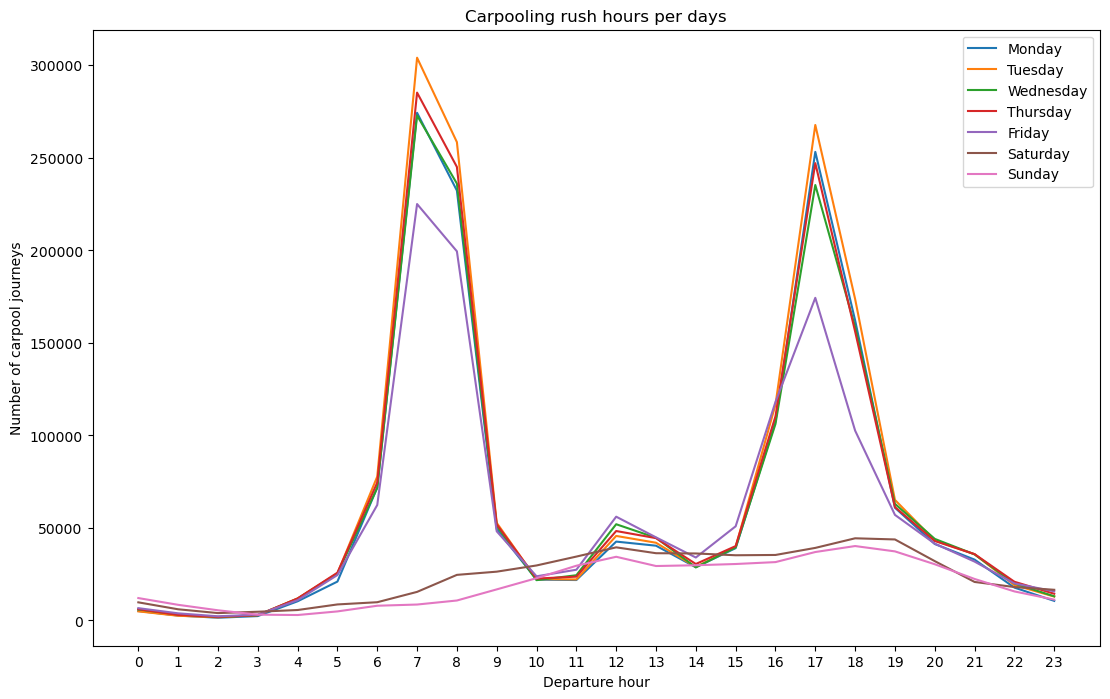

In [32]:
fig=plt.figure(figsize=(13,8))
plt.plot(rush_hourly.index,rush_hourly["Monday"], label="Monday")
plt.plot(rush_hourly.index,rush_hourly["Tuesday"], label="Tuesday")
plt.plot(rush_hourly.index,rush_hourly["Wednesday"], label="Wednesday")
plt.plot(rush_hourly.index,rush_hourly["Thursday"], label="Thursday")
plt.plot(rush_hourly.index,rush_hourly["Friday"], label="Friday")
plt.plot(rush_hourly.index,rush_hourly["Saturday"], label="Saturday")
plt.plot(rush_hourly.index,rush_hourly["Sunday"], label="Sunday")
plt.xticks(ticks=rush_hourly.index,labels=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"])
plt.title("Carpooling rush hours per days")
plt.xlabel("Departure hour")
plt.ylabel("Number of carpool journeys")
plt.legend()

In [33]:
fig.savefig("rush_hours_per_days.jpg")

The number of trips is higher during weekday hours. It can be clearly seen that this increase is due to trips during working hours. The peak times for departures are 7-8 a.m. in the morning and 5-6 p.m. in the evening. We can also notice that these commute trips are less numerous on friday, which could be explain by more people working from home or having free day on fridays. 

In [34]:
#Let's have a more detailed look on the rush hours. 
rush_hour_am = rush_hour.between_time('06:00', '09:00')
rush_hour_pm = rush_hour.between_time('15:00', '19:00')

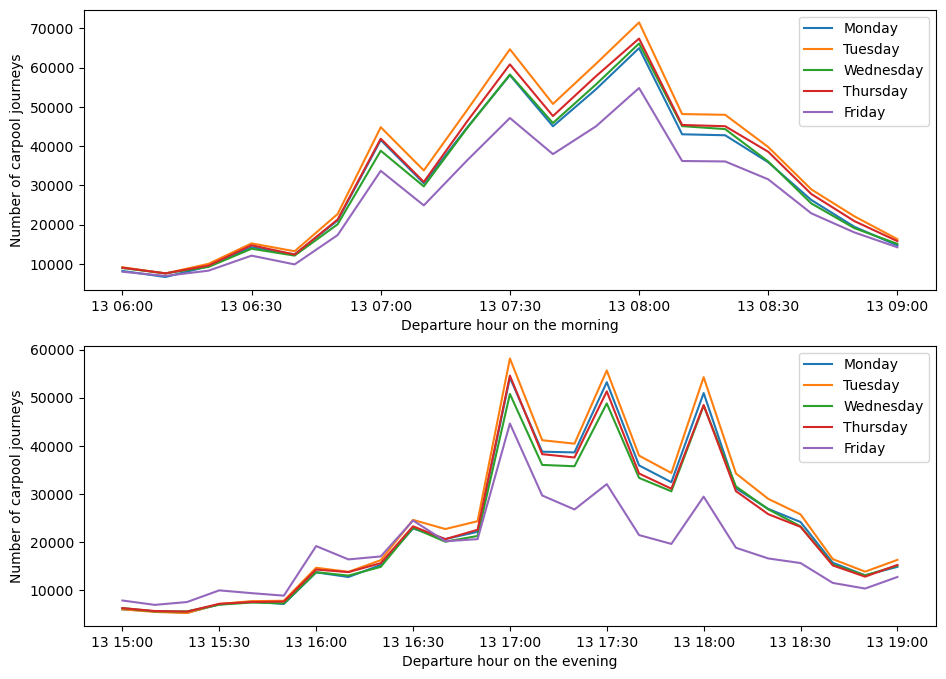

In [35]:
fig, ax = plt.subplots(2,1,figsize = (11,8))

ax[0].plot(rush_hour_am.index,rush_hour_am["Monday"], label="Monday")
ax[0].plot(rush_hour_am.index,rush_hour_am["Tuesday"], label="Tuesday")
ax[0].plot(rush_hour_am.index,rush_hour_am["Wednesday"], label="Wednesday")
ax[0].plot(rush_hour_am.index,rush_hour_am["Thursday"], label="Thursday")
ax[0].plot(rush_hour_am.index,rush_hour_am["Friday"], label="Friday")
ax[0].set_xlabel("Departure hour on the morning")
ax[0].set_ylabel("Number of carpool journeys")
ax[0].legend()

ax[1].plot(rush_hour_pm.index,rush_hour_pm["Monday"], label="Monday")
ax[1].plot(rush_hour_pm.index,rush_hour_pm["Tuesday"], label="Tuesday")
ax[1].plot(rush_hour_pm.index,rush_hour_pm["Wednesday"], label="Wednesday")
ax[1].plot(rush_hour_pm.index,rush_hour_pm["Thursday"], label="Thursday")
ax[1].plot(rush_hour_pm.index,rush_hour_pm["Friday"], label="Friday")
ax[1].set_xlabel("Departure hour on the evening")
ax[1].set_ylabel("Number of carpool journeys")
ax[1].legend()

In [36]:
fig.savefig("rushhours_zoom.jpg")

In [37]:
dist_hours=pd.crosstab(global_schedule_df.journey_start_time,global_schedule_df.weekday,values=global_schedule_df["journey_distance"]/1000, aggfunc="median")
dist_hours.index = pd.to_datetime(dist_hours.index)
dist_hourly = dist_hours.groupby(pd.Grouper(freq="H")).sum()

In [38]:
dist_hourly

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
journey_start_time,,,,,,,
2023-03-13 00:00:00,83.0020,87.1495,83.5025,95.9415,75.2720,69.8390,79.1955
2023-03-13 01:00:00,81.3055,88.4645,87.0760,102.5915,80.4340,74.8750,87.0430
2023-03-13 02:00:00,101.3710,78.4550,100.0370,113.0695,104.0520,97.8680,100.1570
2023-03-13 03:00:00,134.1505,138.5785,118.3650,116.1980,131.0770,133.9730,135.0425
2023-03-13 04:00:00,125.8530,130.9670,123.9090,137.0815,129.5465,132.3410,127.6650
2023-03-13 05:00:00,129.6355,142.7105,125.0205,148.5630,133.5960,134.4235,133.9705
2023-03-13 06:00:00,155.7470,171.9170,124.4980,121.9830,162.4870,165.9270,165.3430
2023-03-13 07:00:00,143.7160,152.3135,116.8340,118.5190,149.5815,150.4425,148.3580
2023-03-13 08:00:00,88.6255,92.4730,105.5195,103.7970,91.2920,91.9430,90.6025


<AxesSubplot:xlabel='weekday', ylabel='journey_start_time'>

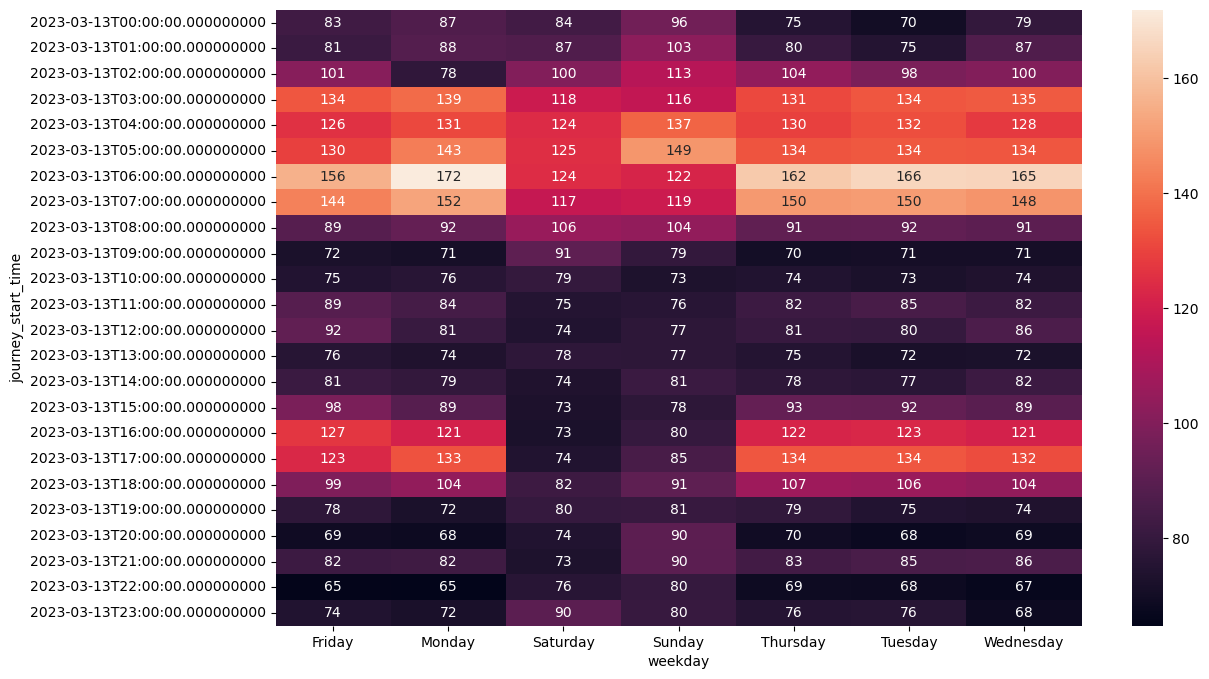

In [39]:
fig=plt.figure(figsize=(13,8))
sns.heatmap(dist_hourly,annot=True,fmt='.0f')

## Trip volume during holidays in 2022

In [40]:
evol2022=global_df[global_df["year"]==2022]

In [41]:
evol2022=pd.crosstab(evol2022.journey_start_date, evol2022.journey_id.count())

Text(0, 0.5, 'Number of carpooling journeys')

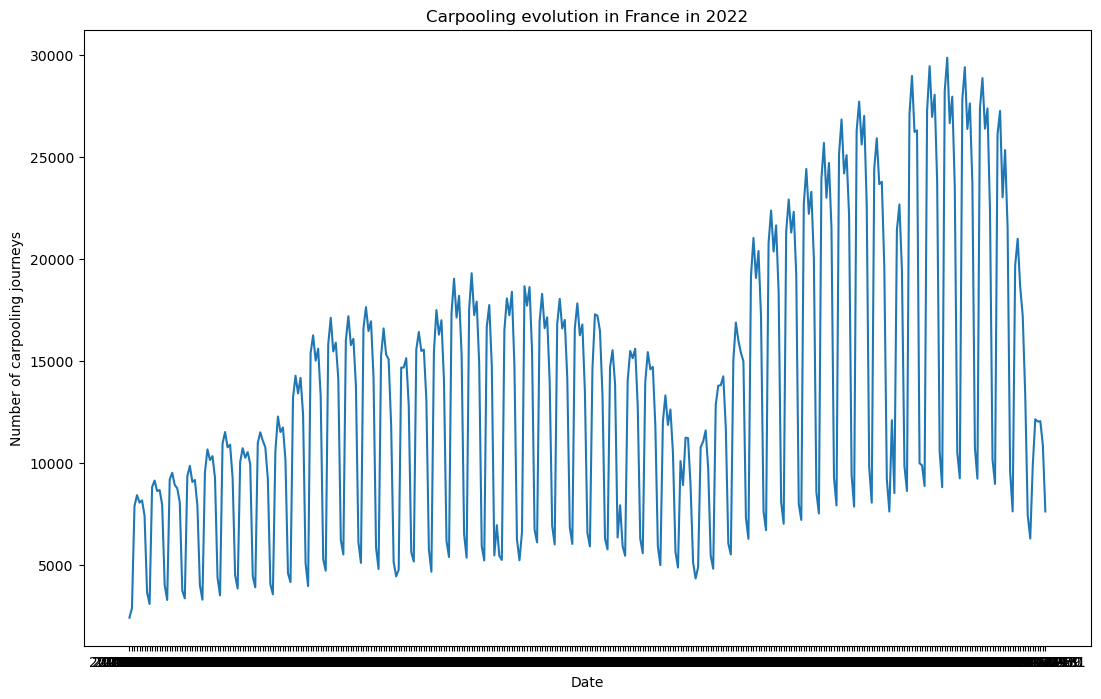

In [42]:
fig=plt.figure(figsize=(13,8))
plt.plot(evol2022)
plt.title("Carpooling evolution in France in 2022")
plt.xlabel("Date")
plt.ylabel("Number of carpooling journeys")

## Distance per days and per season

In [43]:
dist_day=global_schedule_df.groupby("weekday")["journey_distance"].agg("mean")/1000

In [44]:
dist_day

weekday
Friday       23.605736
Monday       24.061356
Saturday     20.335043
Sunday       22.347561
Thursday     23.803006
Tuesday      23.959630
Wednesday    23.581016
Name: journey_distance, dtype: float64

In [45]:
dist_day_year=global_schedule_df.groupby(["weekday","year"])["journey_distance"].agg("mean")/1000

In [46]:
dist_day_year

weekday    year
Friday     2019    18.159291
           2020    24.436528
           2021    23.044265
           2022    24.403749
Monday     2019    18.550270
           2020    25.033094
           2021    24.305185
           2022    24.548957
Saturday   2019    14.818227
           2020    17.578342
           2021    16.260517
           2022    22.777888
Sunday     2019    15.448832
           2020    18.328854
           2021    16.681430
           2022    25.631320
Thursday   2019    18.082256
           2020    24.768350
           2021    24.004081
           2022    24.300917
Tuesday    2019    18.245721
           2020    24.968408
           2021    24.477313
           2022    24.331303
Wednesday  2019    18.020851
           2020    24.546163
           2021    23.628788
           2022    24.044958
Name: journey_distance, dtype: float64

Distances have increased overall since 2019 for all days of the week, but remain very close. 
We could have expected the average distances to be higher on weekends but there are no significant differences. 

In [47]:
dist_season=global_schedule_df.groupby("vacation_level")["journey_distance"].agg("mean")/1000

In [166]:
dist_season=global_schedule_df.groupby("holidays_name")["journey_distance"].agg("mean")/1000

In [169]:
dist_season=pd.DataFrame(dist_season)
dist_season

,journey_distance
holidays_name,
Hors vacances,23.431123
Pont de l'Ascension,21.004985
Vacances d'hiver,23.692735
Vacances d'été,24.174374
Vacances de Noël,22.773653
Vacances de la Toussaint,23.925096
Vacances de printemps,23.253121


/Users/clemence/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Mean distance in km per holidays period')]

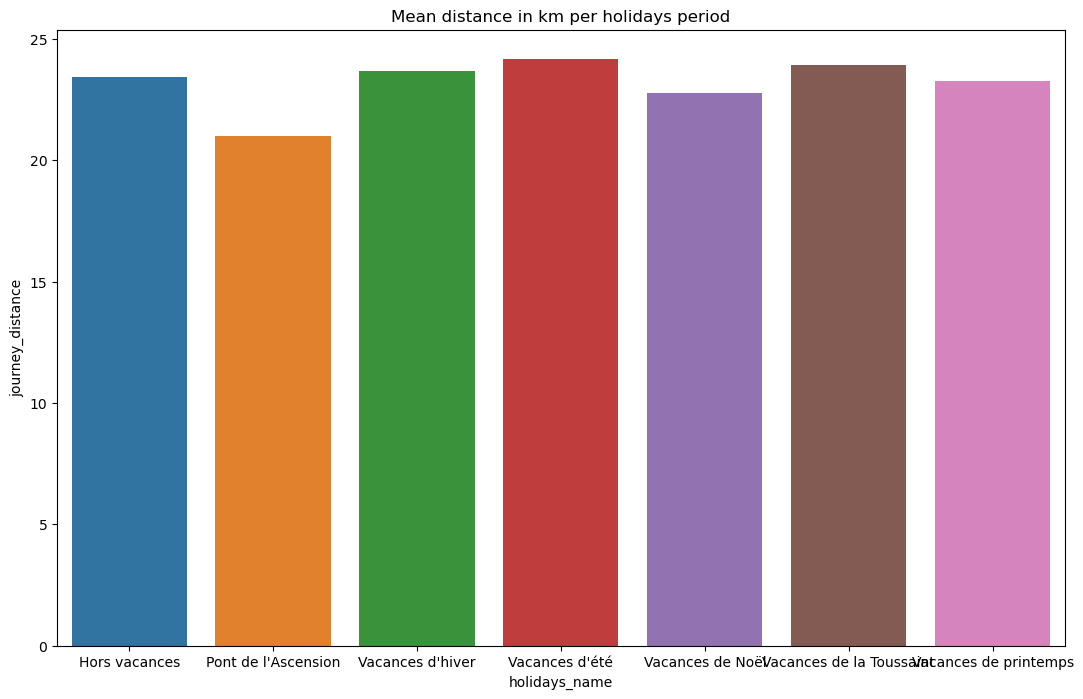

In [181]:
fig=plt.figure(figsize=(13,8))
sns.barplot(dist_season.index,dist_season.journey_distance).set(title="Mean distance in km per holidays period")

There is no impact of holidays on the mean distance. It confirms that the proportion of commute trips is too big compared to the touristic use of carpooling.

In [143]:
plt.bar(x='vacation_level')

TypeError: bar() missing 1 required positional argument: 'height'

In [132]:
count_vac=global_schedule_df.groupby(["holidays_name"])["journey_id"].agg("count")

In [149]:
count_vac=pd.DataFrame(count_vac)
count_vac

,journey_id
holidays_name,
Hors vacances,5939247
Pont de l'Ascension,41648
Vacances d'hiver,717624
Vacances d'été,907989
Vacances de Noël,380342
Vacances de la Toussaint,404363
Vacances de printemps,461794


Text(0.5, 1.0, 'Repartition of journeys according to holidays periods')

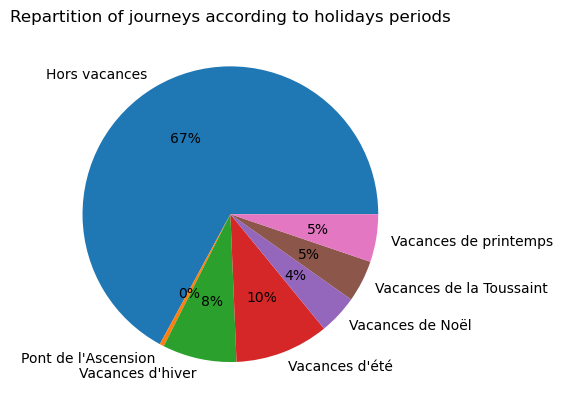

In [160]:

plt.pie(count_vac.journey_id,labels=count_vac.index,autopct='%1.0f%%')
plt.title("Repartition of journeys according to holidays periods")


## Analisys with type of territories

In [49]:
data_cities_df=pd.read_csv("/Users/clemence/IRONHACK/Final_project/Autres datasets/Communes/data_cities.csv")

In [50]:
data_cities_df.head()

,id_city,id_reg,id_dep,city_name,dens_pop,density_degree,density_type,total_pop_2019,no_commute_pop,work_commute_perc
0,01001,84,01,L'Abergement-Clémenciat,48.84,6,Rural à habitat dispersé,779,77.0087,90.1144
1,01002,84,01,L'Abergement-de-Varey,27.98,6,Rural à habitat dispersé,256,10.4024,95.9366
2,01004,84,01,Ambérieu-en-Bugey,574.55,2,Centres urbains intermédiaires,14134,2420.1300,82.8772
3,01005,84,01,Ambérieux-en-Dombes,109.99,5,Bourgs ruraux,1751,152.3040,91.3019
4,01006,84,01,Ambléon,19.05,6,Rural à habitat dispersé,112,NaN,NaN


In [51]:
global_cities_df=pd.merge(global_df,data_cities_df,left_on=global_df["journey_start_insee"],right_on=data_cities_df["id_city"])

In [52]:
global_cities_df.head()

,key_0,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,...,id_city,id_reg,id_dep,city_name,dens_pop,density_degree,density_type,total_pop_2019,no_commute_pop,work_commute_perc
0,94033,7745113,96ccfb6c-85b5-430d-b2bb-c7200faa6c88,2022-07-04T10:40:00+02:00,2022-07-04,10:40:00,2.478,48.848,94033,94.0,...,94033,11,94,Fontenay-sous-Bois,9320.43,1,Grands centres urbains,52008,5110.49,90.1736
1,94033,7745379,954e7e78-25e5-41b4-9ef2-b210e295de04,2022-07-04T13:40:00+02:00,2022-07-04,13:40:00,2.451,48.845,94033,94,...,94033,11,94,Fontenay-sous-Bois,9320.43,1,Grands centres urbains,52008,5110.49,90.1736
2,94033,7743384,3e4cdd36-657c-447d-b1bb-e33361c65f7f,2022-07-04T17:00:00+02:00,2022-07-04,17:00:00,2.495,48.859,94033,94,...,94033,11,94,Fontenay-sous-Bois,9320.43,1,Grands centres urbains,52008,5110.49,90.1736
3,94033,7782449,6fd3a535-cc76-4743-be4e-15f0848e08bf,2022-07-04T17:20:00+02:00,2022-07-04,17:20:00,2.485,48.852,94033,94,...,94033,11,94,Fontenay-sous-Bois,9320.43,1,Grands centres urbains,52008,5110.49,90.1736
4,94033,7724213,d483bbfb-3da5-4d5e-9152-5a7cb156b169,2022-07-04T17:30:00+02:00,2022-07-04,17:30:00,2.467,48.859,94033,94,...,94033,11,94,Fontenay-sous-Bois,9320.43,1,Grands centres urbains,52008,5110.49,90.1736


In [78]:
num_per_type=global_cities_df.groupby("density_degree")["journey_id"].agg("count")

In [79]:
num_per_type

density_degree
1    992354
2    253508
3     74834
4    167969
5    177064
6     82089
7      2062
Name: journey_id, dtype: int64

In [75]:
pop_per_type=global_cities_df.groupby("density_degree")["total_pop_2019"].agg("sum")

In [80]:
pop_per_type=pd.DataFrame(pop_per_type)
pop_per_type

,total_pop_2019
density_degree,
1,100776983880
2,7520888498
3,777159581
4,1069804912
5,668423039
6,134296712
7,1177728


In [81]:
num_per_type=pd.DataFrame(num_per_type)
num_per_type

,journey_id
density_degree,
1,992354
2,253508
3,74834
4,167969
5,177064
6,82089
7,2062


In [82]:
num_per_type["journeys_per_1000inh"]=num_per_type["journey_id"]/pop_per_type["total_pop_2019"]*1000

In [83]:
num_per_type.sort_values('journeys_per_1000inh', ascending=False)

,journey_id,journeys_per_1000inh
density_degree,,
7,2062,1.750829
6,82089,0.611251
5,177064,0.264898
4,167969,0.157009
3,74834,0.096292
2,253508,0.033707
1,992354,0.009847


In [89]:
num_per_type = pd.merge(num_per_type,data_cities_df["density_type"],left_on=dist_per_type.index,right_on=data_cities_df["density_degree"])

In [88]:
num_per_type.drop("journey_id",axis=1,inplace=True)
num_per_type=num_per_type.drop_duplicates()
num_per_type

/var/folders/54/4cl_lcsx2v3_cd3ntyrh62340000gn/T/ipykernel_40763/4292798446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_per_type.drop("journey_id",axis=1,inplace=True)


,journeys_per_1000inh,density_type
key_0,,
1,0.009847,Grands centres urbains
2,0.033707,Centres urbains intermédiaires
3,0.096292,Petites villes
4,0.157009,Ceintures urbaines
5,0.264898,Bourgs ruraux
6,0.611251,Rural à habitat dispersé
7,1.750829,Rural à habitat très dispersé


In [60]:
evol_per_type=pd.crosstab(global_cities_df.density_type, global_cities_df.year)

In [61]:
evol_per_type

year,2020,2022,2023
density_type,,,
Bourgs ruraux,2227,120539,54298
Ceintures urbaines,2531,117672,47766
Centres urbains intermédiaires,5950,174698,72860
Grands centres urbains,26379,757562,208413
Petites villes,1477,50730,22627
Rural à habitat dispersé,839,57046,24204
Rural à habitat très dispersé,13,1347,702


In [112]:
evol_per_type["evol_20_22"]=(evol_per_type.iloc[:,1]-evol_per_type.iloc[:,0])/evol_per_type.iloc[:,0]

In [113]:
evol_per_type["evol_20_22"] = evol_per_type["evol_20_22"].apply(lambda x: "x" + str(round(x)))

In [122]:
evol_per_type.iloc[:,2]

density_type
Bourgs ruraux                      54298
Ceintures urbaines                 47766
Centres urbains intermédiaires     72860
Grands centres urbains            208413
Petites villes                     22627
Rural à habitat dispersé           24204
Rural à habitat très dispersé        702
Name: 2023, dtype: int64

In [128]:
evol_per_type

year,2020,2022,2023,evol_20_22
density_type,,,,
Bourgs ruraux,2227,120539,54298,x53
Ceintures urbaines,2531,117672,47766,x45
Centres urbains intermédiaires,5950,174698,72860,x28
Grands centres urbains,26379,757562,208413,x28
Petites villes,1477,50730,22627,x33
Rural à habitat dispersé,839,57046,24204,x67
Rural à habitat très dispersé,13,1347,702,x103


In [62]:
dist_per_type=global_cities_df.groupby("density_degree")["journey_distance"].agg("mean")/1000
dist_per_type=pd.DataFrame(dist_per_type)
dist_per_type

,journey_distance
density_degree,
1,22.002769
2,29.111642
3,30.174781
4,24.208477
5,27.412426
6,28.485710
7,30.324130


In [63]:
dist_per_type = pd.merge(dist_per_type,data_cities_df["density_type"],left_on=dist_per_type.index,right_on=data_cities_df["density_degree"])

In [64]:
dist_per_type.set_index("key_0",inplace=True)

In [65]:
dist_per_type=dist_per_type.drop_duplicates()

In [66]:
dist_per_type

,journey_distance,density_type
key_0,,
1,22.002769,Grands centres urbains
2,29.111642,Centres urbains intermédiaires
3,30.174781,Petites villes
4,24.208477,Ceintures urbaines
5,27.412426,Bourgs ruraux
6,28.485710,Rural à habitat dispersé
7,30.324130,Rural à habitat très dispersé


In [102]:
dep_pop=global_cities_df.groupby("id_city")["total_pop_2019"].sum()

In [101]:
dep_pop=pd.DataFrame(dep_pop)
dep_pop

,total_pop_2019
id_city,
01004,3943386
01009,2608
01010,12155
01014,13396
01022,2498
...,...
97419,57105
97420,7460150
97422,62262720
